# Model Parameters. 
## Individual model fit - overall data - individual fit

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "More", lab2 = "Less",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [More - Less] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

In [3]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr,patterns):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch(patterns[i])
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) \
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

--------------

# 1. Main figure: Free vs Fixed, gaze bias, 2nd choice parameters

# Load Parameters

In [4]:
params_exp2_gb_2_free = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Free.csv')
params_exp2_gb_2_fix = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Fixed.csv')

In [5]:
params_exp2_gb_2_free

,Unnamed: 0,SNR,b,gamma,p_error,s,t0,tau,v
0,0,184.94,1.0,0.87,0.05,0.008576,[0.],3.94,0.000049
1,1,45.78,1.0,0.94,0.05,0.004716,[0.],0.41,0.000108
2,2,55.03,1.0,0.99,0.05,0.004780,[0.],0.82,0.000078
3,3,148.43,1.0,0.44,0.05,0.008625,[0.],0.63,0.000046
4,4,123.27,1.0,0.93,0.05,0.009921,[0.],1.03,0.000075
5,5,46.33,1.0,0.84,0.05,0.005126,[0.],0.26,0.000121
6,6,257.48,1.0,0.43,0.05,0.009991,[0.],2.58,0.000032
7,7,48.61,1.0,0.85,0.05,0.004439,[0.],0.70,0.000090
8,8,30.61,1.0,0.90,0.05,0.002934,[0.],0.38,0.000125
9,9,64.58,1.0,0.97,0.05,0.005115,[0.],0.73,0.000078


----------------------------
------ gamma ------
------ exp 2 ------
gamma / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-3.834410346155286, pvalue=0.0013278585774653623)
gamma; free mean: 0.8155555555555556; sd: 0.17676796536772976
gamma; fixed mean: 0.9755555555555557; sd: 0.016405358955814905
----------------------------
------ tau (scale) ------
----------------------------
------ exp 2 ------
tau / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=1.0039900266566513, pvalue=0.32946098794773193)
tau; free mean: 1.4433333333333331; sd: 1.168840831289226
tau; fixed mean: 1.1344444444444444; sd: 1.0465510669826241
----------------------------
------ v (drift)  ------
----------------------------
------ exp 2 ------
v / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-1.2006538441790573, pvalue=0.24634881579682594)
v; free mean: 8.072222222222221e-05; sd: 3.142682073847743e-05
v; fixed mean: 8.7e-05; sd: 2.9961085872622618e-05
------------

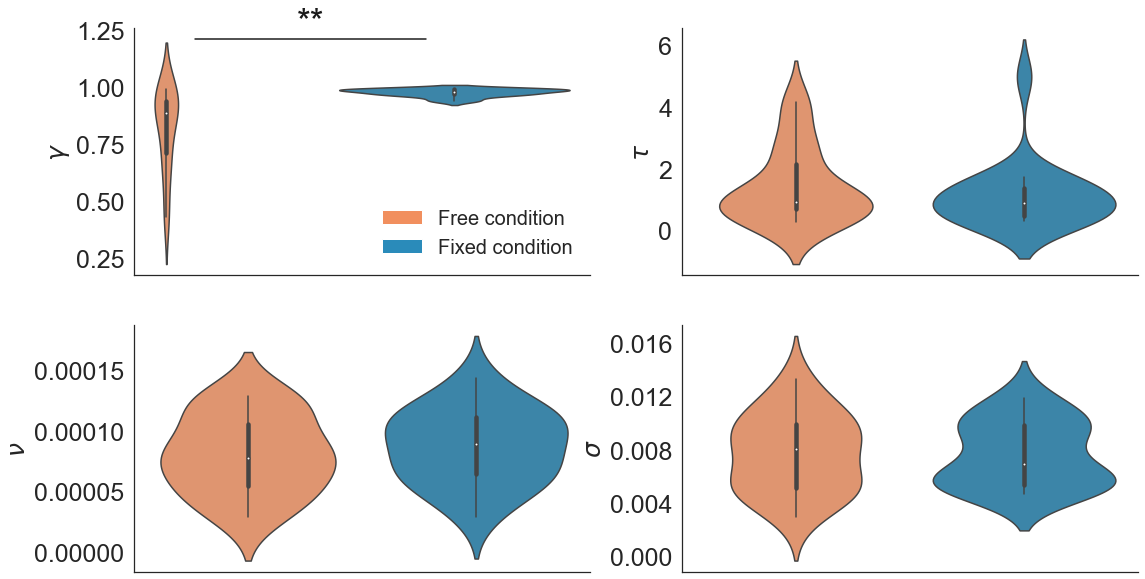

In [6]:
ysize = 25
ticksize = 25
nticks = 5

f= plt.figure(figsize=(18,10))
sns.set(style='white', font_scale=1.8)

colr_dict = {0:'#f18f5e', 1:'#2a8bba'}
patterns = ('', '', '', '', '', '', '', '')

## ** gamma
ax = plt.subplot(221)
param_interest = 'gamma'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest],
            params_exp2_gb_2_fix[param_interest]]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)

plt.ylabel(r'$\gamma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) # remove xticks
plt.xticks([],[])


# Add asterisk
x1, x2 = 0, 1   
y_max = max([np.max(params_exp2_gb_2_free[param_interest]), np.max(params_exp2_gb_2_fix[param_interest])])
y, h, col = y_max + y_max/50, y_max/5, 'k'
plt.plot( [x1+0.10, x2-0.10], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "**",fontsize = 35,  ha='center', va='bottom', color=col)

# plot legend
#st2_nogaze_patch = mpatches.Patch(color='#AC5255',hatch='', label='Study 2 / No Gaze')
#st2_gaze_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Study 2 / Gaze')
st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'', label='Free condition')
st2_fixed_patch = mpatches.Patch(facecolor='#2a8bba',hatch=r'', label='Fixed condition')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = 'lower right',fontsize = 20)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


print ('----------------------------')
print ('------ gamma ------')
print ('------ exp 2 ------')
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))

## ** tau
ax = plt.subplot(222)
param_interest = 'tau'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\tau$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ tau (scale) ------')
print ('----------------------------')

#
print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))


## ** v
ax = plt.subplot(223)
param_interest = 'v'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\nu$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ v (drift)  ------')
print ('----------------------------')


print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))

## ** s
ax = plt.subplot(224)
param_interest = 's'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\sigma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])

print ('----------------------------')
print ('------ s (noise)  ------')
print ('----------------------------')

print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))

sns.despine()

# 2. Params without divergent participants
## Load Parameters

In [17]:

params_exp2_gb_2_free = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Free.csv')
params_exp2_gb_2_fix = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Fixed.csv')

In [18]:
# if remove participants that have problems with convergence in both scenarios

params_exp2_gb_2_free = params_exp2_gb_2_free.drop([0,1,2,5,8,10,15])
params_exp2_gb_2_fix = params_exp2_gb_2_fix.drop([0,1,2,5,8,10,15])

In [19]:
params_exp2_gb_2_free['gamma'].values

array([0.44, 0.93, 0.43, 0.85, 0.97, 0.65, 0.99, 0.98, 0.93, 0.94, 0.61])

----------------------------
------ gamma ------
------ exp 2 ------
gamma / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-3.002117576143472, pvalue=0.013295460641799667)
gamma; free mean: 0.7927272727272726; sd: 0.20841788917683055
gamma; fixed mean: 0.9827272727272729; sd: 0.01482682402754555
----------------------------
------ tau (scale) ------
----------------------------
------ exp 2 ------
tau / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-0.365543541875288, pvalue=0.7223193654487319)
tau; free mean: 1.3663636363636362; sd: 0.7810630602788942
tau; fixed mean: 1.4836363636363636; sd: 1.1845848734109556
----------------------------
------ v (drift)  ------
----------------------------
------ exp 2 ------
v / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-0.014011045056973578, pvalue=0.9890967622076259)
v; free mean: 7.427272727272727e-05; sd: 3.2722221832462606e-05
v; fixed mean: 7.436363636363637e-05; sd: 3.024828388001459e-05

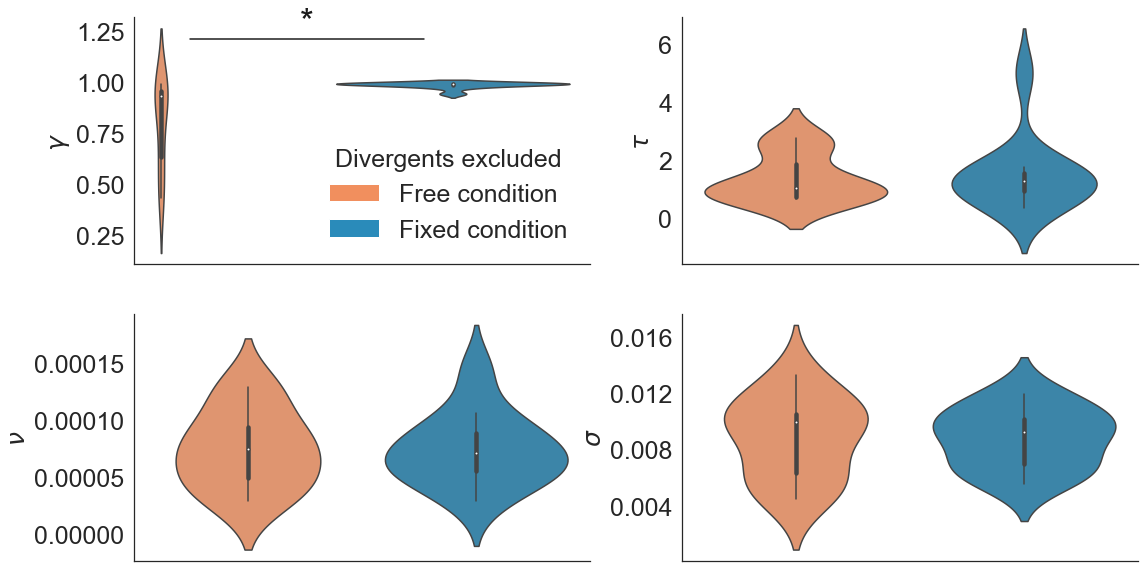

In [20]:
ysize = 25
ticksize = 25
nticks = 5

f= plt.figure(figsize=(18,10))
sns.set(style='white', font_scale=1.8)

colr_dict = {0:'#f18f5e', 1:'#2a8bba'}
patterns = ('', '', '', '', '', '', '', '')

## ** gamma
ax = plt.subplot(221)
param_interest = 'gamma'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest],
            params_exp2_gb_2_fix[param_interest]]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)

plt.ylabel(r'$\gamma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) # remove xticks
plt.xticks([],[])


# Add asterisk
x1, x2 = 0, 1   
y_max = max([np.max(params_exp2_gb_2_free[param_interest]), np.max(params_exp2_gb_2_fix[param_interest])])
y, h, col = y_max + y_max/50, y_max/5, 'k'
plt.plot( [x1+0.10, x2-0.10], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*",fontsize = 35,  ha='center', va='bottom', color=col)

# plot legend
#st2_nogaze_patch = mpatches.Patch(color='#AC5255',hatch='', label='Study 2 / No Gaze')
#st2_gaze_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Study 2 / Gaze')
st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'', label='Free condition')
st2_fixed_patch = mpatches.Patch(facecolor='#2a8bba',hatch=r'', label='Fixed condition')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = 'lower right',fontsize = 25, title = 'Divergents excluded')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
leg.get_title().set_fontsize(25) #legend 'Title' fontsize


print ('----------------------------')
print ('------ gamma ------')
print ('------ exp 2 ------')
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))


## ** tau
ax = plt.subplot(222)
param_interest = 'tau'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\tau$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ tau (scale) ------')
print ('----------------------------')

#
print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))



## ** v
ax = plt.subplot(223)
param_interest = 'v'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\nu$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ v (drift)  ------')
print ('----------------------------')


print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))

## ** s
ax = plt.subplot(224)
param_interest = 's'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\sigma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])

print ('----------------------------')
print ('------ s (noise)  ------')
print ('----------------------------')

print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))



sns.despine()

-----------------

# 3. Binned Free Gaze

# Load Parameters

In [41]:
params_exp2_gb_2_free = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Free_Gaze3Bins.csv')
params_exp2_gb_2_fix = pd.read_csv('Results/ParamsEstimates/GlamCP2020_params_indiv_GazeBias_exp2_2ndChoice_Fixed.csv')

In [42]:
params_exp2_gb_2_free

,Unnamed: 0,SNR,b,gamma,p_error,s,t0,tau,v
0,0,155.95,1.0,0.94,0.05,0.009151,[0.],4.44,0.000047
1,1,40.55,1.0,0.96,0.05,0.004452,[0.],0.81,0.000110
2,2,58.15,1.0,0.99,0.05,0.005107,[0.],1.00,0.000080
3,3,171.21,1.0,0.58,0.05,0.009539,[0.],0.64,0.000046
4,4,166.78,1.0,0.90,0.05,0.011821,[0.],1.03,0.000060
5,5,45.42,1.0,0.10,0.05,0.005317,[0.],0.06,0.000117
6,6,306.88,1.0,0.73,0.05,0.010484,[0.],4.70,0.000030
7,7,55.73,1.0,0.91,0.05,0.004661,[0.],0.70,0.000088
8,8,28.35,1.0,0.94,0.05,0.004067,[0.],0.36,0.000124
9,9,60.52,1.0,0.95,0.05,0.005036,[0.],0.67,0.000078


In [43]:
# if remove participants that have problems with convergence in both scenarios
params_exp2_gb_2_free = params_exp2_gb_2_free.drop([0,1,2,5,8,10,15])
params_exp2_gb_2_fix = params_exp2_gb_2_fix.drop([0,1,2,5,8,10,15])

In [44]:
params_exp2_gb_2_free['gamma'].values

array([0.58, 0.9 , 0.73, 0.91, 0.95, 0.86, 0.99, 0.99, 0.98, 0.99, 0.83])

----------------------------
------ gamma ------
------ exp 2 ------
gamma / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-2.8030595529069404, pvalue=0.018696160788436715)
gamma; free mean: 0.8827272727272728; sd: 0.12351598417657302
gamma; fixed mean: 0.9827272727272729; sd: 0.01482682402754555
----------------------------
------ tau (scale) ------
----------------------------
------ exp 2 ------
tau / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=0.6764943021863229, pvalue=0.5140690746584762)
tau; free mean: 1.6581818181818184; sd: 1.2625862215873216
tau; fixed mean: 1.4836363636363636; sd: 1.1845848734109556
----------------------------
------ v (drift)  ------
----------------------------
------ exp 2 ------
v / 2nd Choice / Gaze Bias/ free-fixed : Ttest_relResult(statistic=-0.08758050919971856, pvalue=0.9319390799240745)
v; free mean: 7.38181818181818e-05; sd: 3.32970601536537e-05
v; fixed mean: 7.436363636363637e-05; sd: 3.024828388001459e-05
--

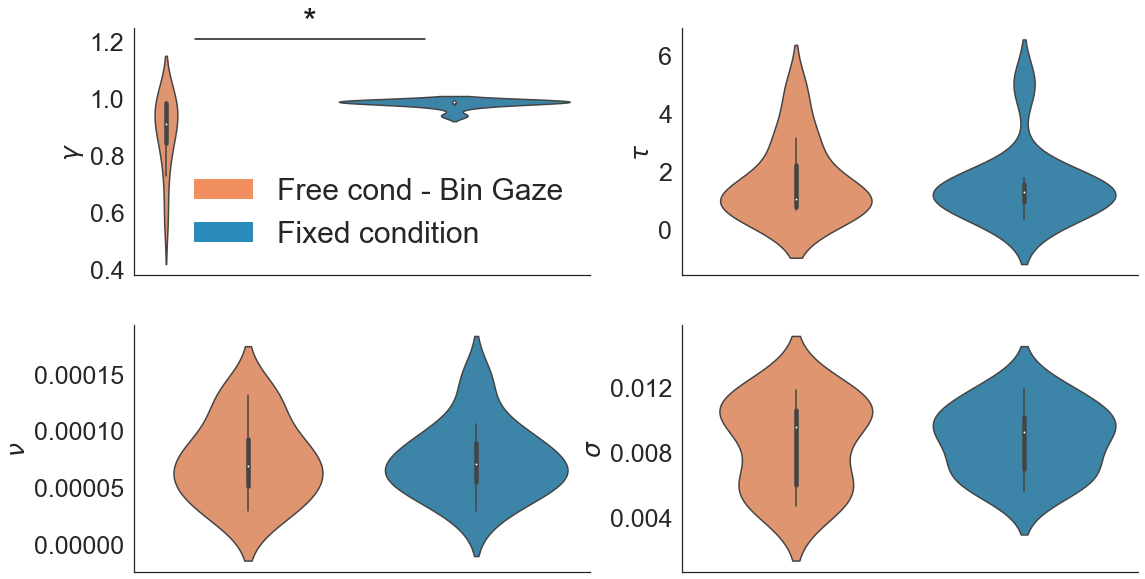

In [45]:
ysize = 25
ticksize = 25
nticks = 5

f= plt.figure(figsize=(18,10))
sns.set(style='white', font_scale=1.8)

colr_dict = {0:'#f18f5e', 1:'#2a8bba'}
patterns = ('', '', '', '', '', '', '', '')

## ** gamma
ax = plt.subplot(221)
param_interest = 'gamma'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest],
            params_exp2_gb_2_fix[param_interest]]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)

plt.ylabel(r'$\gamma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) # remove xticks
plt.xticks([],[])


# Add asterisk
x1, x2 = 0, 1   
y_max = max([np.max(params_exp2_gb_2_free[param_interest]), np.max(params_exp2_gb_2_fix[param_interest])])
y, h, col = y_max + y_max/50, y_max/5, 'k'
plt.plot( [x1+0.10, x2-0.10], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*",fontsize = 35,  ha='center', va='bottom', color=col)

# plot legend
#st2_nogaze_patch = mpatches.Patch(color='#AC5255',hatch='', label='Study 2 / No Gaze')
#st2_gaze_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Study 2 / Gaze')
st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'', label='Free cond - Bin Gaze')
st2_fixed_patch = mpatches.Patch(facecolor='#2a8bba',hatch=r'', label='Fixed condition')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = 'lower right',fontsize = 30)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


print ('----------------------------')
print ('------ gamma ------')
print ('------ exp 2 ------')
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))


## ** tau
ax = plt.subplot(222)
param_interest = 'tau'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\tau$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ tau (scale) ------')
print ('----------------------------')

#
print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))



## ** v
ax = plt.subplot(223)
param_interest = 'v'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\nu$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])


print ('----------------------------')
print ('------ v (drift)  ------')
print ('----------------------------')


print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))

## ** s
ax = plt.subplot(224)
param_interest = 's'
#plt.subplot(321)
all_arr1 = [params_exp2_gb_2_free[param_interest].values,
            params_exp2_gb_2_fix[param_interest].values]

bplot = sns.violinplot(data=all_arr1 , palette=colr_dict)
plt.ylabel(r'$\sigma$', size = ysize)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])

print ('----------------------------')
print ('------ s (noise)  ------')
print ('----------------------------')

print ('------ exp 2 ------')
#print(param_interest+'/ 1st Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_1_fix[param_interest].values)))
#print(param_interest+'/ 2nd Choice / No Bias / free-fixed : ' + str(stats.ttest_rel(params_exp2_nb_2_free[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / free : ' + str(stats.ttest_rel(params_exp2_nb_1_free[param_interest].values,params_exp2_nb_2_free[param_interest].values)))
#print(param_interest+'/ 1st - 2nd Choice / No Bias / fixed : '+ str(stats.ttest_rel(params_exp2_nb_1_fix[param_interest].values,params_exp2_nb_2_fix[param_interest].values)))
print(param_interest + ' / 2nd Choice / Gaze Bias/ free-fixed : ' + str(stats.ttest_rel( params_exp2_gb_2_free[param_interest],params_exp2_gb_2_fix[param_interest])))
print(param_interest + '; free mean: ' + str(np.mean(params_exp2_gb_2_free[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_free[param_interest])))
print(param_interest + '; fixed mean: ' + str(np.mean(params_exp2_gb_2_fix[param_interest])) + '; sd: ' + str(np.std(params_exp2_gb_2_fix[param_interest])))



sns.despine()

-----------------

## plot for figure 5 (just for example)

([<matplotlib.axis.XTick at 0x7fbe7c020b00>,
 <a list of 2 Text xticklabel objects>)

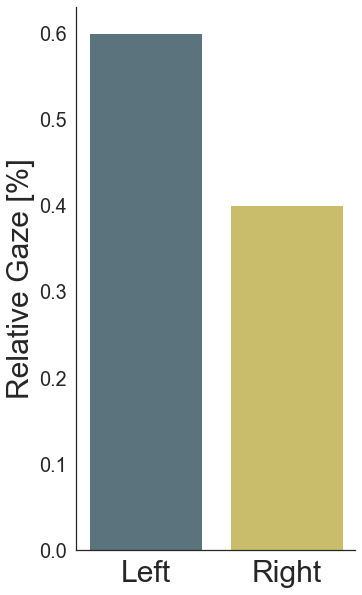

In [17]:
f= plt.figure(figsize=(5,10))

plt.bar([0],[0.60], color = "#5a737d")
plt.bar([1],[0.40],  color = "#c9bd6b")
sns.despine()
plt.ylabel(r'Relative Gaze [%]', size = 30)
plt.xticks([0,1],['Left','Right'],size = 30)


# --- [END]  ---